In [3]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#http://archive.ics.uci.edu/ml/datasets/credit+approval
#http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html
#https://www.kaggle.com/code/chandanabhatt/prediction-of-credit-approval
# Credit approval dataset
# $ Male          : num  1 1 0 0 0 0 1 0 0 0 ...
# $ Age           : chr  "58.67" "24.50" "27.83" "20.17" ...
# $ Debt          : num  4.46 0.5 1.54 5.62 4 ...
# $ Married       : chr  "u" "u" "u" "u" ...
# $ BankCustomer  : chr  "g" "g" "g" "g" ...
# $ EducationLevel: chr  "q" "q" "w" "w" ...
# $ Ethnicity     : chr  "h" "h" "v" "v" ...
# $ YearsEmployed : num  3.04 1.5 3.75 1.71 2.5 ...
# $ PriorDefault  : num  1 1 1 1 1 1 1 1 1 0 ...
# $ Employed      : num  1 0 1 0 0 0 0 0 0 0 ...
# $ CreditScore   : num  6 0 5 0 0 0 0 0 0 0 ...
# $ DriversLicense: chr  "f" "f" "t" "f" ...
# $ Citizen       : chr  "g" "g" "g" "s" ...
# $ ZipCode       : chr  "00043" "00280" "00100" "00120" ...
# $ Income        : num  560 824 3 0 0 ...
# $ Approved      : chr  "+" "+" "+" "+" ...

def load_credit_approval():
    df = pd.read_csv('data/credit-approval.data',sep=",")
    protected_attribute = 'Male'
    majority_group_name = "Female"
    minority_group_name = "Male"
    class_label = 'Approved'
    filename = "DT.credit_approval.abroca.png"
    
    print("Length:",len(df))
    print("Number of attribute:",len(df.columns))
    #Remove missing value
    df = df[df['Male'] != '?']   
    #Label sex
    df['Male']=["Female" if v == "a" else "Male" for v in df['Male']]
    #Label class
    df['Approved']=[1 if v == "+" else 0 for v in df['Approved']]
    
    print("Length (cleaned):",len(df))
    print("Class imbalance: \n",df[class_label].value_counts())
    
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
#Credit card client
#Gender (1 = male; 2 = female)
def load_credit_card():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'default payment'
    filename = "DT.credit_card.abroca.png"   
    
    print("Length:",len(df))
    print("Number of attribute:",len(df.columns))
    
    #Label sex
    df['SEX']=["Female" if v == 2 else "Male" for v in df['SEX']]
    
    print("Length (cleaned):",len(df))
    print("Class imbalance: \n",df[class_label].value_counts())
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
#German credit
def load_german_credit():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "male"
    minority_group_name = "female"
    class_label = 'class-label'
    filename = "DT.german_credit.abroca.png"    
    
    print("Length:",len(df))
    print("Number of attribute:",len(df.columns))
    
    print("Length (cleaned):",len(df))
    print("Class imbalance: \n",df[class_label].value_counts())
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_PAKDD2010():
    df = pd.read_csv('data/PAKDD.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'TARGET_LABEL_BAD'
    filename = "DT.PAKDD.abroca.png"    
    
    print("Length:",len(df))
    print("Number of attribute:",len(df.columns))
    
    #Remove ID
    df=df.drop(columns=['ID_CLIENT'])
    df =df.dropna()
    df=df.drop(columns = ['RESIDENCIAL_PHONE_AREA_CODE','RESIDENCIAL_ZIP_3','PROFESSIONAL_ZIP_3'])
    #Label sex
    df['SEX']=["Female" if v == "F" else "Male" for v in df['SEX']]
    
    
    print("Length (cleaned):",len(df))
    print("Class imbalance: \n",df[class_label].value_counts())
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
#Credit scoring data
#https://www.kaggle.com/code/islombekdavronov/credit-scoring
#FinTech companies in Central Asia.
def load_credit_scoring():
    df = pd.read_csv('data/credit_scoring.csv')    
    protected_attribute = 'Sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'label'
    filename = "DT.credit_scoring.abroca.png"    
    
    print("Length:",len(df))
    print("Number of attribute:",len(df.columns))
    
    df = df.replace({'-':0})
    df['Score_point']=df['Score_point'].astype(float)
    
       
    #Label sex
    df['Sex']=["Female" if v == 2 else "Male" for v in df['Sex']]
    
    print("Length (cleaned):",len(df))
    print("Class imbalance: \n",df[class_label].value_counts())
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,1:length-1]
    y = df[class_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_application(): 
  df=pd.read_csv('data/application_train.csv')   #length: 307511
  df=df.dropna() #length: 8602
  df=df.drop(columns=['SK_ID_CURR'])

  protected_attribute = 'CODE_GENDER'
  majority_group_name = "M"
  minority_group_name = "F"
  class_label = 'TARGET'
  filename = "DT.application.abroca.png"    
    
  
  print("Length:",len(df))
  print("Number of attribute:",len(df.columns))

  le = preprocessing.LabelEncoder()
  for i in df.columns:
    if df[i].dtypes == 'object':
      df[i] = le.fit_transform(df[i])

  #Splitting data into train and test
  length = len(df.columns)
  X = df.iloc[:,1:length-1]
  y = df[class_label]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
  #Get index    
  feature = X.keys().tolist()    
  sa_index = feature.index(protected_attribute)
  p_Group = 0 
    
  return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [18]:
def load_south_german_credit():
  df=pd.read_csv('data/SouthGermanCredit.asc', sep=' ') 
  print(df['famges'].value_counts())

  protected_attribute = 'CODE_GENDER'
  majority_group_name = "M"
  minority_group_name = "F"
  class_label = 'kredit'
  filename = "DT.south_german_credit.abroca.pdf"  

In [19]:
load_south_german_credit()

3    548
2    310
4     92
1     50
Name: famges, dtype: int64


In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run DT model
    DT = tree.DecisionTreeClassifier(random_state=0)
    DT.fit(X_train,y_train)
    print(y_test)
    y_predicts = DT.predict(X_test)
    y_pred_probs = DT.predict_proba(X_test)
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    
    #make predictions
    X_test['pred_proba'] = DT.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    print(len(df_test))
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'credit-approval':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_approval()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'credit-card':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_card()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'german-credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'PAKDD':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_PAKDD2010()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'credit-scoring':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit_scoring()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'application':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_application()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                       

Length: 690
Number of attribute: 16
Length (cleaned): 678
Class imbalance: 
 0    374
1    304
Name: Approved, dtype: int64
657    0
338    0
63     1
370    0
101    0
      ..
551    1
497    1
177    1
454    0
426    0
Name: Approved, Length: 204, dtype: int64
Statistical parity:
{'balanced_accuracy': 0.7646198830409356, 'accuracy': 0.7696078431372549, 'f1-score': 0.7344632768361581, 'fairness': 0.08400664084117321}
Equal opportunity
{'balanced_accuracy': 0.7646198830409356, 'accuracy': 0.7696078431372549, 'f1-score': 0.7344632768361581, 'fairness': 0.09615384615384615, 'TPR_protected': 0.6538461538461539, 'TPR_non_protected': 0.75, 'TNR_protected': 0.8205128205128205, 'TNR_non_protected': 0.8}
Equalized odds
{'balanced_accuracy': 0.7646198830409356, 'accuracy': 0.7696078431372549, 'f1-score': 0.7344632768361581, 'fairness': 0.11666666666666659, 'TPR_protected': 0.6538461538461539, 'TPR_non_protected': 0.75, 'TNR_protected': 0.8205128205128205, 'TNR_non_protected': 0.8}
Predictive 

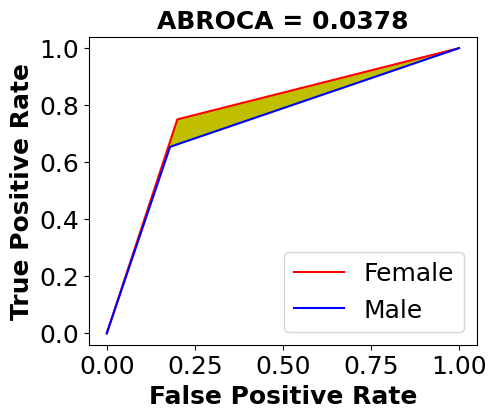

ABROCA: 0.037820514613555505


In [10]:
run_eval('credit-approval')

Length: 30000
Number of attribute: 24
Length (cleaned): 30000
Class imbalance: 
 0    23364
1     6636
Name: default payment, dtype: int64
2308     0
22404    0
23397    0
25058    0
2664     1
        ..
3941     1
17854    0
95       0
6279     0
26428    0
Name: default payment, Length: 9000, dtype: int64
Statistical parity:
{'balanced_accuracy': 0.6131276089981447, 'accuracy': 0.7276666666666667, 'f1-score': 0.3961566888396157, 'fairness': 0.03079995659112042}
Equal opportunity
{'balanced_accuracy': 0.6131276089981447, 'accuracy': 0.7276666666666667, 'f1-score': 0.3961566888396157, 'fairness': 0.02625839148778092, 'TPR_protected': 0.42152466367713004, 'TPR_non_protected': 0.3952662721893491, 'TNR_protected': 0.8315001170138077, 'TNR_non_protected': 0.7921937116010119}
Equalized odds
{'balanced_accuracy': 0.6131276089981447, 'accuracy': 0.7276666666666667, 'f1-score': 0.3961566888396157, 'fairness': 0.06556479690057665, 'TPR_protected': 0.42152466367713004, 'TPR_non_protected': 0.39

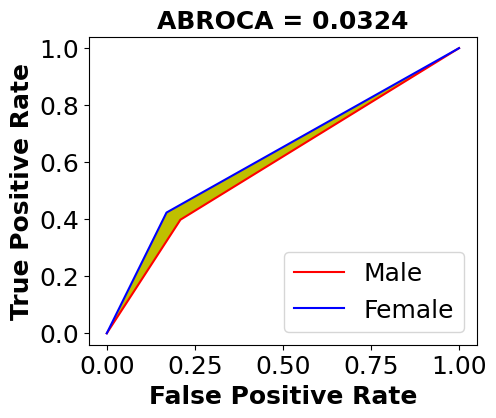

ABROCA: 0.03242894158012864


In [11]:
run_eval('credit-card')

Length: 1000
Number of attribute: 22
Length (cleaned): 1000
Class imbalance: 
 1    700
0    300
Name: class-label, dtype: int64
521    0
737    1
740    1
660    1
411    1
      ..
468    1
935    0
428    1
7      1
155    0
Name: class-label, Length: 300, dtype: int64
Statistical parity:
{'balanced_accuracy': 0.5953783059046217, 'accuracy': 0.6566666666666666, 'f1-score': 0.7529976019184652, 'fairness': 0.04845626072041165}
Equal opportunity
{'balanced_accuracy': 0.5953783059046217, 'accuracy': 0.6566666666666666, 'f1-score': 0.7529976019184652, 'fairness': 0.016045197740112926, 'TPR_protected': 0.7627118644067796, 'TPR_non_protected': 0.7466666666666667, 'TNR_protected': 0.5517241379310345, 'TNR_non_protected': 0.3870967741935484}
Equalized odds
{'balanced_accuracy': 0.5953783059046217, 'accuracy': 0.6566666666666666, 'f1-score': 0.7529976019184652, 'fairness': 0.18067256147759903, 'TPR_protected': 0.7627118644067796, 'TPR_non_protected': 0.7466666666666667, 'TNR_protected': 0.551

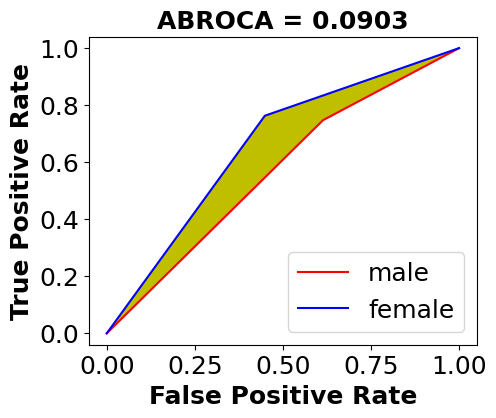

ABROCA: 0.09033628007002462


In [12]:
run_eval('german-credit')

Length: 50000
Number of attribute: 47
Length (cleaned): 38896
Class imbalance: 
 0    28747
1    10149
Name: TARGET_LABEL_BAD, dtype: int64
14048    0
15359    0
24535    0
33655    0
15523    1
        ..
8245     0
35933    0
22742    0
31510    0
15072    0
Name: TARGET_LABEL_BAD, Length: 11669, dtype: int64
Statistical parity:
{'balanced_accuracy': 0.5241417021523852, 'accuracy': 0.6243894078327191, 'f1-score': 0.3048374306106265, 'fairness': 0.012434346153057163}
Equal opportunity
{'balanced_accuracy': 0.5241417021523852, 'accuracy': 0.6243894078327191, 'f1-score': 0.3048374306106265, 'fairness': 0.03251140367944311, 'TPR_protected': 0.29768467475192945, 'TPR_non_protected': 0.33019607843137255, 'TNR_protected': 0.7384267971396311, 'TNR_non_protected': 0.7351500306184936}
Equalized odds
{'balanced_accuracy': 0.5241417021523852, 'accuracy': 0.6243894078327191, 'f1-score': 0.3048374306106265, 'fairness': 0.035788170200580616, 'TPR_protected': 0.29768467475192945, 'TPR_non_protected'

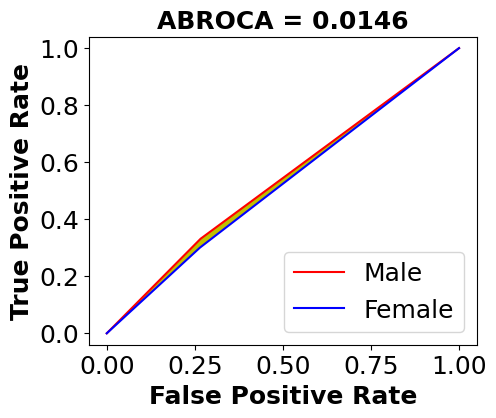

ABROCA: 0.014617318596370573


In [13]:
run_eval('PAKDD')

Length: 8755
Number of attribute: 18
Length (cleaned): 8755
Class imbalance: 
 1    8059
0     696
Name: label, dtype: int64
3151    1
7727    1
8175    1
4409    1
994     1
       ..
5284    1
1912    1
4996    1
599     0
45      0
Name: label, Length: 2627, dtype: int64
Statistical parity:
{'balanced_accuracy': 0.9760808679722185, 'accuracy': 0.9923867529501332, 'f1-score': 0.9958298582151793, 'fairness': 0.03449334698055273}
Equal opportunity
{'balanced_accuracy': 0.9760808679722185, 'accuracy': 0.9923867529501332, 'f1-score': 0.9958298582151793, 'fairness': 0.0031845699686340323, 'TPR_protected': 0.9946200403496974, 'TPR_non_protected': 0.9978046103183315, 'TNR_protected': 0.9631901840490797, 'TNR_non_protected': 0.9393939393939394}
Equalized odds
{'balanced_accuracy': 0.9760808679722185, 'accuracy': 0.9923867529501332, 'f1-score': 0.9958298582151793, 'fairness': 0.02698081462377433, 'TPR_protected': 0.9946200403496974, 'TPR_non_protected': 0.9978046103183315, 'TNR_protected': 0.

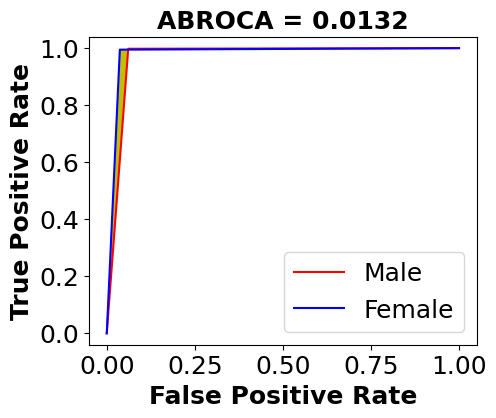

ABROCA: 0.013173101120510273


In [14]:
run_eval('credit-scoring')

Length: 8602
Number of attribute: 121
211086    0
152765    0
219787    1
296216    0
197268    0
         ..
24924     0
94448     0
283787    0
146555    0
224037    0
Name: TARGET, Length: 2581, dtype: int64
Statistical parity:
{'balanced_accuracy': 0.5370169177901136, 'accuracy': 0.8795040681906238, 'f1-score': 0.1288515406162465, 'fairness': 0.0272737101976826}
Equal opportunity
{'balanced_accuracy': 0.5370169177901136, 'accuracy': 0.8795040681906238, 'f1-score': 0.1288515406162465, 'fairness': 0.013753106876553428, 'TPR_protected': 0.15492957746478872, 'TPR_non_protected': 0.1411764705882353, 'TNR_protected': 0.9414225941422594, 'TNR_non_protected': 0.9121951219512195}
Equalized odds
{'balanced_accuracy': 0.5370169177901136, 'accuracy': 0.8795040681906238, 'f1-score': 0.1288515406162465, 'fairness': 0.042980579067593255, 'TPR_protected': 0.15492957746478872, 'TPR_non_protected': 0.1411764705882353, 'TNR_protected': 0.9414225941422594, 'TNR_non_protected': 0.9121951219512195}
Pred

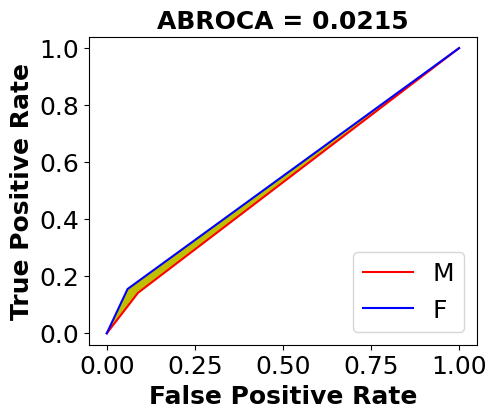

ABROCA: 0.021490287764710236


In [15]:
run_eval('application')